In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
#import SentimentAnalyzer
import DataFramer

#nltk.download('vader_lexicon')


c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# Reading the saved data pickle file
#df_stocks = pd.read_pickle('data.pkl')
#df_stocks = DataFramer.loadData()
df_stocks = pd.read_pickle('stockData.pkl')

In [3]:
df_stocks



,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,Headlines
date,,,,,,,,
2010-01-08,626.950,629.5100,589.1100,602.020,301.9421,40115900.0,0.0,"In Allowing Ad Blockers, a Test for Google. Go..."
2010-01-15,604.460,604.4600,573.9000,580.000,290.8980,56418100.0,0.0,"Google Refuses to Kowtow. Google, Citing Attac..."
2010-01-22,581.490,590.4200,534.8600,550.010,275.8565,41309300.0,0.0,Far-Ranging Support for Google’s China Move. F...
2010-01-29,546.590,549.8775,525.6100,529.944,265.7925,40178300.0,0.0,"Google’s Sales Rose 17% in the Quarter, Fastes..."
2010-02-05,534.602,542.1000,522.4600,531.290,266.4676,31727600.0,0.0,Google vs. China: Considering Threats to Inter...
2010-02-12,532.500,542.0000,527.6900,533.120,267.3854,25730200.0,0.0,Google Asks Spy Agency for Help With Inquiry I...
2010-02-19,537.140,545.0100,534.3000,540.763,271.2187,21126800.0,0.0,Google Agrees to Buy Social Search Service. Go...
2010-02-26,547.350,547.5000,520.0000,526.800,264.2156,25379000.0,0.0,Judge Hears Arguments on Google Book Settlemen...
2010-03-05,529.200,567.6700,527.7400,564.210,282.9785,33526400.0,0.0,Google and Brazil in Tourism Deal. When Americ...


In [4]:
df_stocks['prices'] = df_stocks['5. adjusted close'].apply(np.int64)

In [5]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'Headlines']]

df_stocks = df_stocks.replace({'Headlines': {'': np.nan}}).ffill()

In [6]:
df_stocks

#df_stocks['articles'][0]

,prices,Headlines
date,,
2010-01-08,301,"In Allowing Ad Blockers, a Test for Google. Go..."
2010-01-15,290,"Google Refuses to Kowtow. Google, Citing Attac..."
2010-01-22,275,Far-Ranging Support for Google’s China Move. F...
2010-01-29,265,"Google’s Sales Rose 17% in the Quarter, Fastes..."
2010-02-05,266,Google vs. China: Considering Threats to Inter...
2010-02-12,267,Google Asks Spy Agency for Help With Inquiry I...
2010-02-19,271,Google Agrees to Buy Social Search Service. Go...
2010-02-26,264,Judge Hears Arguments on Google Book Settlemen...
2010-03-05,282,Google and Brazil in Tourism Deal. When Americ...


In [7]:
df = df_stocks[['prices']].copy()
df

,prices
date,
2010-01-08,301
2010-01-15,290
2010-01-22,275
2010-01-29,265
2010-02-05,266
2010-02-12,267
2010-02-19,271
2010-02-26,264
2010-03-05,282


In [8]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [9]:
df

,prices,compound,neg,neu,pos
date,,,,,
2010-01-08,301,,,,
2010-01-15,290,,,,
2010-01-22,275,,,,
2010-01-29,265,,,,
2010-02-05,266,,,,
2010-02-12,267,,,,
2010-02-19,271,,,,
2010-02-26,264,,,,
2010-03-05,282,,,,


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    #try:
    sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'Headlines'])#.encode('ascii','ignore')
    ss = sid.polarity_scores(sentence)
    df.set_value(date, 'compound', ss['compound'])
    df.set_value(date, 'neg', ss['neg'])
    df.set_value(date, 'neu', ss['neu'])
    df.set_value(date, 'pos', ss['pos'])
    #except TypeError:
        #print (df_stocks.loc[date, 'Headlines'])
        #print (date)

c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back b

In [11]:
# sentence = 'paris shootout police officer suspected guman dead'
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import unicodedata
# sid = SentimentIntensityAnalyzer()
# ss = sid.polarity_scores(sentence)
# ss

In [12]:
# Checking date for empty strings
# for date, row in df_stocks.T.iteritems():
#     if type(df_stocks.loc[date, 'articles']).__name__ == 'str':
#         print date

In [13]:
df

,prices,compound,neg,neu,pos
date,,,,,
2010-01-08,301,0.3919,0,0.962,0.038
2010-01-15,290,-0.3075,0.144,0.733,0.123
2010-01-22,275,-0.9618,0.185,0.723,0.092
2010-01-29,265,0.8513,0.038,0.855,0.107
2010-02-05,266,-0.0258,0.103,0.796,0.101
2010-02-12,267,0.91,0.08,0.725,0.195
2010-02-19,271,-0.4939,0.122,0.788,0.09
2010-02-26,264,-0.7463,0.104,0.835,0.06
2010-03-05,282,-0.0772,0.023,0.977,0


In [14]:
train_start_date = '2010-01-08'
train_end_date = '2017-01-06'
test_start_date = '2017-01-13'
test_end_date = '2019-01-04'
train = df.ix[train_start_date : train_end_date]
test = df.ix[test_start_date:test_end_date]

c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [15]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [16]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [17]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [18]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [19]:
print (rf.feature_importances_)

[0.47149724 0.52850276]


In [20]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)



In [21]:
prediction

array([[512.43165538],
       [512.43165538],
       [469.9       ],
       [397.9       ],
       [397.9       ],
       [397.9       ],
       [512.43165538],
       [620.89583333],
       [580.3       ],
       [580.3       ],
       [624.43083333],
       [482.8       ],
       [517.9       ],
       [512.43165538],
       [512.43165538],
       [512.43165538],
       [348.2       ],
       [348.2       ],
       [512.43165538],
       [284.8       ],
       [531.        ],
       [531.        ],
       [308.        ],
       [373.        ],
       [482.3       ],
       [512.43165538],
       [480.        ],
       [480.        ],
       [512.43165538],
       [512.43165538],
       [521.        ],
       [381.        ],
       [422.27714286],
       [496.7       ],
       [562.6       ],
       [512.43165538],
       [547.8       ],
       [553.06666667],
       [326.225     ],
       [510.5       ],
       [701.86      ],
       [447.94      ],
       [512.43165538],
       [512

In [22]:
contributions

array([[ 1.15498102e+01,  2.81996048e+01],
       [ 1.15498102e+01,  2.81996048e+01],
       [-2.79763172e+01,  2.51940767e+01],
       [-1.09101009e+02,  3.43187685e+01],
       [-1.09101009e+02,  3.43187685e+01],
       [-1.09101009e+02,  3.43187685e+01],
       [ 1.15498102e+01,  2.81996048e+01],
       [ 1.39813696e+02,  8.39989674e+00],
       [ 1.15656328e+02, -8.03856888e+00],
       [ 1.15656328e+02, -8.03856888e+00],
       [ 1.43048696e+02,  8.69989674e+00],
       [ 9.62463968e+00,  4.93119885e-01],
       [ 2.00236828e+01,  2.51940767e+01],
       [ 1.15498102e+01,  2.81996048e+01],
       [ 1.15498102e+01,  2.81996048e+01],
       [ 1.15498102e+01,  2.81996048e+01],
       [-5.37568984e+01, -7.07253420e+01],
       [-5.37568984e+01, -7.07253420e+01],
       [ 1.15498102e+01,  2.81996048e+01],
       [-3.23843337e+01, -1.55497907e+02],
       [ 2.85170145e+01,  2.98007450e+01],
       [ 2.85170145e+01,  2.98007450e+01],
       [-1.91886166e+02,  2.72039252e+01],
       [-5.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline




In [24]:
idx = pd.date_range(test_start_date, test_end_date, freq='7d')


predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

In [25]:
predictions_df

,prices
2017-01-13,512.431655
2017-01-20,512.431655
2017-01-27,469.900000
2017-02-03,397.900000
2017-02-10,397.900000
2017-02-17,397.900000
2017-02-24,512.431655
2017-03-03,620.895833
2017-03-10,580.300000
2017-03-17,580.300000


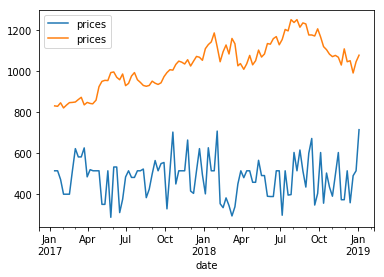

In [26]:
#predictions_df.plot() 
#test['prices'].plot()

predictions_plot = predictions_df.plot()

fig = y_test.plot(ax = predictions_plot).get_figure()
fig.savefig("random forest without smoothing.png")

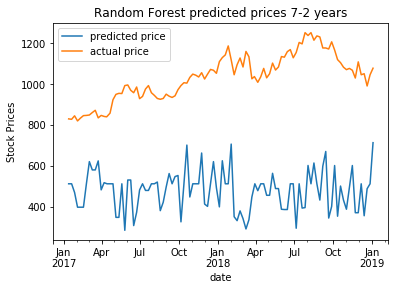

In [27]:
ax = predictions_df.rename(columns={"prices": "predicted price"}).plot(title='Random Forest predicted prices 7-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual price"}).plot(ax = ax).get_figure()
fig.savefig("random forest without smoothing.png")

# colors = ['332288', '88CCEE', '44AA99', '117733', '999933', 'DDCC77', 'CC6677', '882255', 'AA4499']

In [28]:
test

,prices,compound,neg,neu,pos
date,,,,,
2017-01-13,830,0,0,1,0
2017-01-20,828,0,0,1,0
2017-01-27,845,-0.8316,0.173,0.827,0
2017-02-03,820,-0.3182,0.277,0.723,0
2017-02-10,834,-0.3182,0.277,0.723,0
2017-02-17,846,-0.3182,0.277,0.723,0
2017-02-24,847,0,0,1,0
2017-03-03,849,-0.7063,0.423,0.577,0
2017-03-10,861,-0.128,0.196,0.646,0.158


# Increasing the prices by a constant value so that it represents closing price during the testing

In [29]:
from datetime import datetime, timedelta

temp_date = test_start_date
average_last_3_weeks_test = 0
total_weeks = 6
for i in range(total_weeks):
    average_last_3_weeks_test += test.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Reducing one day from date time
    difference = temp_date + timedelta(days=7)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
average_last_3_weeks_test = average_last_3_weeks_test / total_weeks
print (average_last_3_weeks_test)

temp_date = test_start_date
average_upcoming_3_weeks_predicted = 0
for i in range(total_weeks):
    average_upcoming_3_weeks_predicted += predictions_df.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day from date time
    difference = temp_date + timedelta(days=7)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    print (temp_date)
average_upcoming_3_weeks_predicted = average_upcoming_3_weeks_predicted / total_weeks
print (average_upcoming_3_weeks_predicted)
#average train.loc['2013-12-31', 'prices'] - advpredictions_df.loc['2014-01-01', 'prices']
difference_test_predicted_prices = average_last_3_weeks_test - average_upcoming_3_weeks_predicted
print (difference_test_predicted_prices)

833.8333333333334
2017-01-20
2017-01-27
2017-02-03
2017-02-10
2017-02-17
2017-02-24
448.07721845947276
385.7561148738606


In [30]:
predictions_df

,prices
2017-01-13,512.431655
2017-01-20,512.431655
2017-01-27,469.900000
2017-02-03,397.900000
2017-02-10,397.900000
2017-02-17,397.900000
2017-02-24,512.431655
2017-03-03,620.895833
2017-03-10,580.300000
2017-03-17,580.300000


In [31]:
# Adding 6177 to all the advpredictions_df price values
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df

,prices
2017-01-13,898.187770
2017-01-20,898.187770
2017-01-27,855.656115
2017-02-03,783.656115
2017-02-10,783.656115
2017-02-17,783.656115
2017-02-24,898.187770
2017-03-03,1006.651948
2017-03-10,966.056115
2017-03-17,966.056115


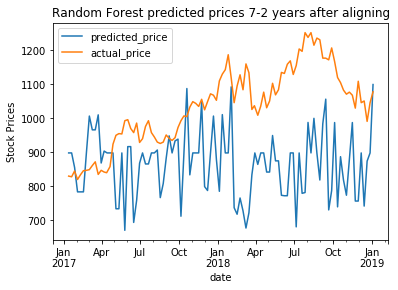

In [32]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 7-2 years after aligning')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("random forest with aligning.png")



# Smoothing the time series data

# Applying EWMA pandas to smooth the stock prices

In [33]:
predictions_df

,prices
2017-01-13,898.187770
2017-01-20,898.187770
2017-01-27,855.656115
2017-02-03,783.656115
2017-02-10,783.656115
2017-02-17,783.656115
2017-02-24,898.187770
2017-03-03,1006.651948
2017-03-10,966.056115
2017-03-17,966.056115


In [34]:
#predictions_df['ewm'] = pd.ewm(predictions_df["prices"], span=60, freq="D")
predictions_df['ewm'] = predictions_df["prices"].ewm(span=60).mean()

In [35]:
predictions_df

,prices,ewm
2017-01-13,898.187770,898.187770
2017-01-20,898.187770,898.187770
2017-01-27,855.656115,883.535396
2017-02-03,783.656115,857.303448
2017-02-10,783.656115,841.575932
2017-02-17,783.656115,831.100622
2017-02-24,898.187770,841.669038
2017-03-03,1006.651948,864.776657
2017-03-10,966.056115,877.587644
2017-03-17,966.056115,887.819388


In [36]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = predictions_df["actual_value"].ewm(span=60).mean()

In [37]:
predictions_df

,prices,ewm,actual_value,actual_value_ewma
2017-01-13,898.187770,898.187770,830.0,830.000000
2017-01-20,898.187770,898.187770,828.0,828.983333
2017-01-27,855.656115,883.535396,845.0,834.501157
2017-02-03,783.656115,857.303448,820.0,830.692624
2017-02-10,783.656115,841.575932,834.0,831.398920
2017-02-17,783.656115,831.100622,846.0,834.039654
2017-02-24,898.187770,841.669038,847.0,836.081332
2017-03-03,1006.651948,864.776657,849.0,837.890729
2017-03-10,966.056115,877.587644,861.0,840.813854
2017-03-17,966.056115,887.819388,872.0,844.420661


In [38]:
# Changing column names
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

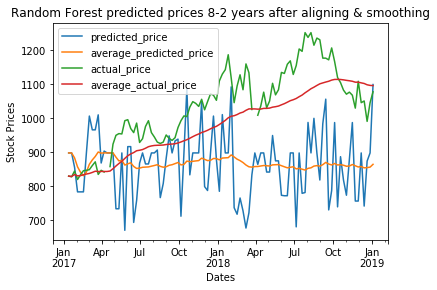

In [39]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest predicted prices 7-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("random forest after smoothing.png")


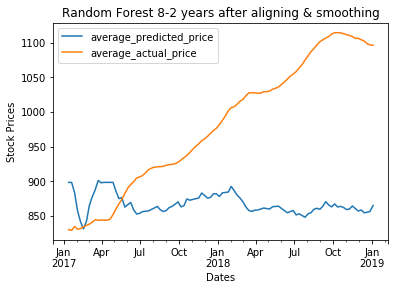

In [40]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'average_actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest 7-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("random forest after smoothing 2.png")

# Increasing the prices by a constant value so that it represents closing price during the testing

In [43]:
def offset_value(test_start_date, test, predictions_df):
    
    average_upcoming_3_weeks_predicted = 0
    temp_date = test_start_date
    average_last_3_weeks_test = 0
    total_weeks = 6
    for i in range(total_weeks):
        average_last_3_weeks_test += test.loc[temp_date, 'prices']
    # Converting string to date time
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Reducing one day from date time
        difference = temp_date + timedelta(days=7)
    # Converting again date time to string
        temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
    average_last_3_weeks_test = average_last_3_weeks_test / total_weeks

    temp_date = test_start_date
    for i in range(total_weeks):
        average_upcoming_3_weeks_predicted += predictions_df.loc[temp_date, 'prices']
    # Converting string to date time
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day from date time
        difference = temp_date + timedelta(days=7)
    # Converting again date time to string
        temp_date = difference.strftime('%Y-%m-%d')
        print (temp_date)
    average_upcoming_3_weeks_predicted = average_upcoming_3_weeks_predicted / total_weeks
    print (average_upcoming_3_weeks_predicted)
#average train.loc['2013-12-31', 'prices'] - advpredictions_df.loc['2014-01-01', 'prices']
    difference_test_predicted_prices = average_last_3_weeks_test - average_upcoming_3_weeks_predicted
    return difference_test_predicted_prices





# LogisticRegression

c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureW

2017-01-20
2017-01-27
2017-02-03
2017-02-10
2017-02-17
2017-02-24
297.6666666666667


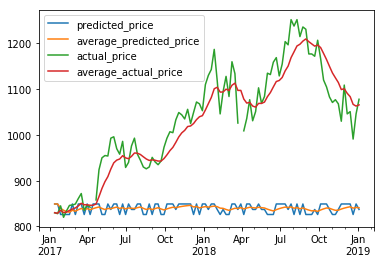

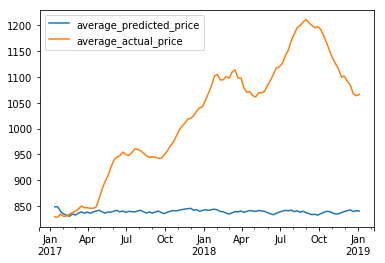

In [45]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
prediction_list = []
for i in range (1):
    # Splitting the training and testing data
    train_start_date = '2010-01-08'
    train_end_date = '2017-01-06'
    test_start_date = '2017-01-13'
    test_end_date = '2019-01-04'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    lr = LogisticRegression()
    lr.fit(numpy_df_train, train['prices'])
    

    prediction = lr.predict(numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date, freq='7d')
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(span=10).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(span=10).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    

In [ ]:
lr.classes_

In [ ]:
lr.coef_[0]

# RandomForestRegressor

c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


2017-01-20
2017-01-27
2017-02-03
2017-02-10
2017-02-17
2017-02-24
428.51534170004123


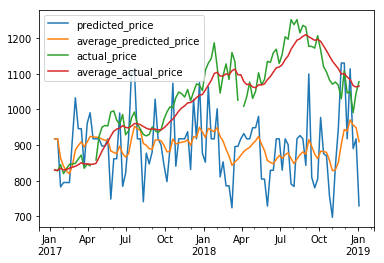

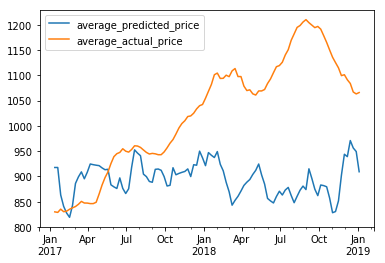

In [46]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for i in range (1):
    # Splitting the training and testing data
    train_start_date = '2010-01-08'
    train_end_date = '2017-01-06'
    test_start_date = '2017-01-13'
    test_end_date = '2019-01-04'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    rf = RandomForestRegressor(random_state=0)
    rf.fit(numpy_df_train, train['prices'])
    #print rf
    
    prediction, bias, contributions = ti.predict(rf, numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date, freq='7d')
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(span=10).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(span=10).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    

In [ ]:
# from IPython.display import Image  
# dot_data = tree.export_graphviz(rf, out_file=None, 
#                      feature_names=['comp', 'neg', 'neu', 'pos'],  
#                      class_names=iris.target_names,  
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
# Image(graph.create_png())

# MLP Classifier

c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


2017-01-20
2017-01-27
2017-02-03
2017-02-10
2017-02-17
2017-02-24
327.0


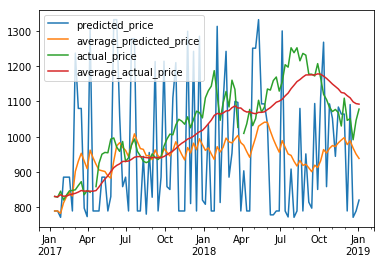

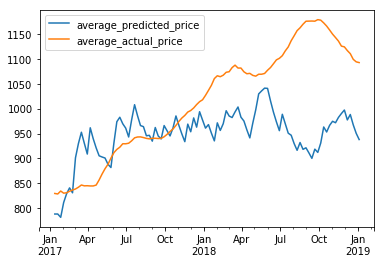

In [110]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for i in range (1):
    # Splitting the training and testing data
    train_start_date = '2010-01-08'
    train_end_date = '2017-01-06'
    test_start_date = '2017-01-13'
    test_end_date = '2019-01-04'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.0005, shuffle=False) # span = 20 # best 1
    mlpc.fit(numpy_df_train, train['prices'])   
    prediction = mlpc.predict(numpy_df_test)
    
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date, freq='7d')
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices 
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(span=20).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(span=20).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    

In [106]:
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='tanh', 
                         solver='lbfgs', alpha=0.010, learning_rate_init = 0.001, shuffle=False)
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.010, learning_rate_init = 0.001, shuffle=False) # span = 20
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 50), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
                     

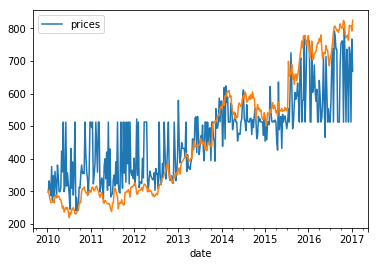

In [56]:
# checking the performance of training data itself
prediction, bias, contributions = ti.predict(rf, numpy_df_train)
idx = pd.date_range(train_start_date, train_end_date, freq='7d')
predictions_df1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
predictions_df1.plot() 
train['prices'].plot()

In [104]:
s = test['prices'].as_matrix()
d = np.asarray(test['prices'])
ytest = d.reshape(104,1)

s = train['prices'].as_matrix()
d = np.asarray(train['prices'])
ytrain = d.reshape(366,1)

test['prices'].shape

c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


(104,)

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


# Splitting the training and testing data
train_start_date = '2010-01-08'
train_end_date = '2017-01-06'
test_start_date = '2017-01-13'
test_end_date = '2019-01-04'
train = df.ix[train_start_date : train_end_date]
test = df.ix[test_start_date:test_end_date]

sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

   # mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
    #0                     solver='lbfgs', alpha=0.005, learning_rate_init = 0.0005, shuffle=False) # span = 20 # best 1
    #mlpc.fit(numpy_df_train, train['prices'])   
    #prediction = mlpc.predict(numpy_df_test)

#y = price

#numpy_df_test = numpy_df_test.reshape(1, 104, 4)
#numpy_df_train = numpy_df_train.reshape(1, 366, 4)





model = Sequential()

# IF you are running with a GPU, try out the CuDNNLSTM layer type instead (don't pass an activation, tanh is required)
model.add(LSTM(128, input_shape=(366,4), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

model.fit(numpy_df_train,
          ytrain,
          epochs=3,
          validation_data=(numpy_df_test, ytest))

c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
c:\users\talal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


ValueError: Error when checking input: expected lstm_18_input to have 3 dimensions, but got array with shape (366, 4)